In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#selecting variables based on the literature
columns = ['happy', 'gndr', 'agea','dvrcdeva', 'eduyrs' ,'domicil' ,'rlgdgr' ,'netusoft' ,'sclmeet','health' ,'maritalb', 'mnactic' ,'hinctnta' ,'cntry']

In [3]:
#reading data
data = pd.read_csv(r"C:\Users\GU44DR\ESS10.csv")

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2384855849.py:2: DtypeWarning: Columns (385,386) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(r"C:\Users\GU44DR\ESS10.csv")


In [4]:
#selecting columns
data1 = data[columns]
data2=data1.loc[data1['cntry']=='FI']

In [5]:
data2.head()

,happy,gndr,agea,dvrcdeva,eduyrs,domicil,rlgdgr,netusoft,sclmeet,health,maritalb,mnactic,hinctnta,cntry
6736,10,2,24.0,1,12,3,0,5,4,1,3,1,1,FI
6737,9,1,77.0,1,14,4,8,5,6,1,1,6,8,FI
6738,2,2,33.0,2,18,3,0,5,5,4,6,1,5,FI
6739,9,2,75.0,2,10,4,7,5,5,1,6,6,6,FI
6740,9,2,32.0,2,18,5,10,5,3,2,1,1,3,FI


In [85]:
#calculating frequencies of the variables - target variable
freq_happy=pd.crosstab(index=data2['happy'], columns='count')
freq_happy

col_0,count
happy,
0,1
1,4
2,7
3,13
4,27
5,38
6,54
7,186
8,512


In [86]:
#deleting observations with no response
data2.drop(data2[(data2.happy==77) | (data2.happy==88) | (data2.happy==99)].index, inplace=True)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2324003508.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(data2[(data2.happy==77) | (data2.happy==88) | (data2.happy==99)].index, inplace=True)


In [87]:
#creating a binary target variable
data2['happy2'] = data2['happy'].apply(lambda x: 1 if x > 7 else 0)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\4177703255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['happy2'] = data2['happy'].apply(lambda x: 1 if x > 7 else 0)


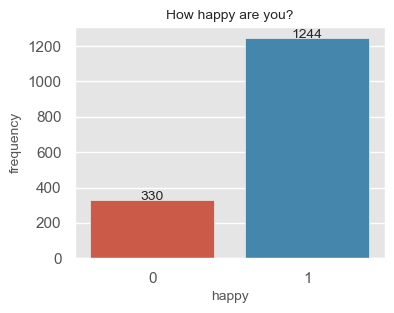

In [91]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='happy2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('How happy are you?',fontsize = 10, fontweight='normal')
plot.set_xlabel('happy', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [92]:
#calculating frequencies of the variables - gender variable
freq_gndr=pd.crosstab(index=data2['gndr'], columns='count')
freq_gndr

col_0,count
gndr,
1,777
2,797


In [93]:
# 0 female, 1 male
data2['gndr2'] = data2['gndr'].apply(lambda x: 0 if x==2 else 1)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\1076027124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['gndr2'] = data2['gndr'].apply(lambda x: 0 if x==2 else 1)


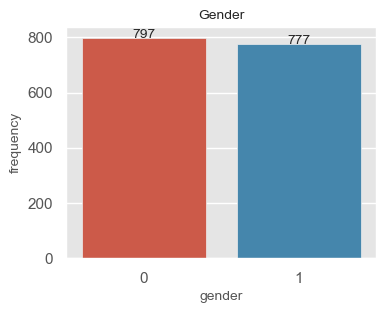

In [94]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='gndr2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('Gender',fontsize = 10, fontweight='normal')
plot.set_xlabel('gender', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()


In [95]:
#calculating frequencies of the variables - divorced variable
freq_dvrcdeva=pd.crosstab(index=data2['dvrcdeva'], columns='count')
freq_dvrcdeva

col_0,count
dvrcdeva,
1,349
2,1225


C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\1230542010.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['dvrcdeva2'] = data2['dvrcdeva'].apply(lambda x: 0 if x==2 else 1)


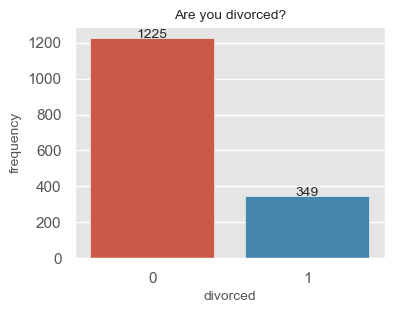

In [96]:
#0 no, 1 yes
data2['dvrcdeva2'] = data2['dvrcdeva'].apply(lambda x: 0 if x==2 else 1)
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='dvrcdeva2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('Are you divorced?',fontsize = 10, fontweight='normal')
plot.set_xlabel('divorced', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [97]:
#calculating frequencies of the variables - Domicile variable
freq_domicil=pd.crosstab(index=data2['domicil'], columns='count')
freq_domicil

col_0,count
domicil,
1,370
2,191
3,485
4,252
5,276


In [98]:
#contingency table 
pd.crosstab(index=data2['happy2'], columns=data2['domicil'])

domicil,1,2,3,4,5
happy2,,,,,
0,76,49,110,41,54
1,294,142,375,211,222


In [100]:
#Categorization of the Domicile variable
# Defining all the conditions inside a function
def condition(x):
    if (x==1)|(x==2):
        return 0
    elif x==3:
        return 1
    else:
        return 2
 
# Applying the conditions
data2['domicil2'] = data2['domicil'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['domicil2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\3383484198.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['domicil2'] = data2['domicil'].apply(condition)


domicil2,0,1,2
happy2,,,
0,125,110,95
1,436,375,433


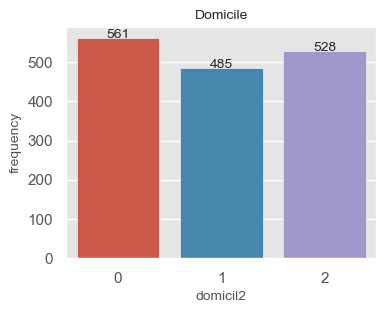

In [102]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='domicil2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('Domicile',fontsize = 10, fontweight='normal')
plot.set_xlabel('domicil2', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [30]:
#calculating frequencies of the variables - How religious are you variable
freq_rlgdgr=pd.crosstab(index=data2['rlgdgr'], columns='count')
freq_rlgdgr

col_0,count
rlgdgr,
0,196
1,130
2,158
3,150
4,97
5,206
6,144
7,184
8,178


In [103]:
#deleting observations with no response
data2.drop(data2[(data2.rlgdgr==77) | (data2.rlgdgr==88)].index, inplace=True)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\406462967.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(data2[(data2.rlgdgr==77) | (data2.rlgdgr==88)].index, inplace=True)


In [105]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['rlgdgr'])

rlgdgr,0,1,2,3,4,5,6,7,8,9,10
happy2,,,,,,,,,,,
0,52,38,42,32,21,46,28,32,24,10,5
1,144,92,117,118,78,160,117,153,154,70,36


In [106]:
#Categorization of the rlgdgr variable
def condition(x):
    if x<4:
        return 0
    elif (x>=4)&(x<8):
        return 1
    else:
        return 2
data2['rlgdgr2'] = data2['rlgdgr'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['rlgdgr2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\590051904.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['rlgdgr2'] = data2['rlgdgr'].apply(condition)


rlgdgr2,0,1,2
happy2,,,
0,164,127,39
1,471,508,260


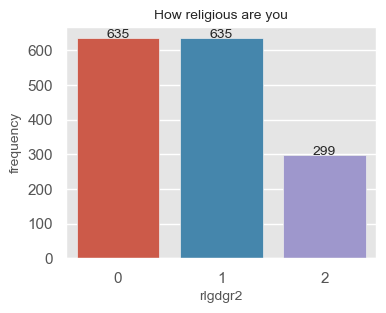

In [107]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='rlgdgr2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('How religious are you',fontsize = 10, fontweight='normal')
plot.set_xlabel('rlgdgr2', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [108]:
#calculating frequencies of the variables - Internet use variable
freq_netusoft=pd.crosstab(index=data2['netusoft'], columns='count')
freq_netusoft

col_0,count
netusoft,
1,105
2,49
3,52
4,65
5,1298


In [ ]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['netusoft'])

In [109]:
#Categorization of the netusoft variable
def condition(x):
    if x<4:
        return 0
    else:
        return 1
data2['netusoft2'] = data2['netusoft'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['netusoft2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2022815595.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['netusoft2'] = data2['netusoft'].apply(condition)


netusoft2,0,1
happy2,,
0,62,268
1,144,1095


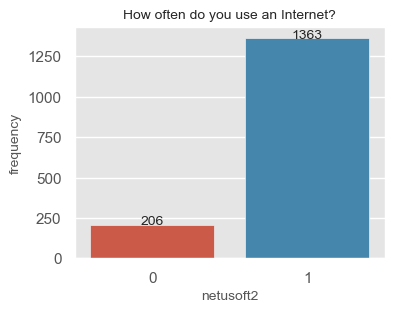

In [110]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='netusoft2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('How often do you use an Internet?',fontsize = 10, fontweight='normal')
plot.set_xlabel('netusoft2', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [34]:
#calculating frequencies of the variables - How often socially meet with friends, relatives or colleagues variable
freq_sclmeet=pd.crosstab(index=data2['sclmeet'], columns='count')
freq_sclmeet

col_0,count
sclmeet,
1,6
2,130
3,187
4,348
5,333
6,422
7,137


In [111]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['sclmeet'])

sclmeet,1,2,3,4,5,6,7
happy2,,,,,,,
0,3,39,51,76,65,71,25
1,3,93,138,273,268,352,112


In [112]:
#Categorization of the sclmeet variable
def condition(x):
    if x<4:
        return 0
    elif (x>=4)&(x<6):
        return 1
    else:
        return 2
data2['sclmeet2'] = data2['sclmeet'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['sclmeet2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\3787722723.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['sclmeet2'] = data2['sclmeet'].apply(condition)


sclmeet2,0,1,2
happy2,,,
0,93,141,96
1,234,541,464


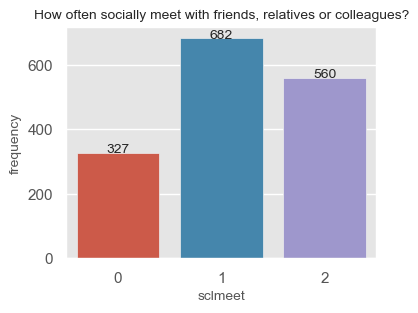

In [116]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='sclmeet2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('How often socially meet with friends, relatives or colleagues?',fontsize = 10, fontweight='normal')
plot.set_xlabel('sclmeet', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [117]:
#calculating frequencies of the variables -  general health variable
freq_health=pd.crosstab(index=data2['health'], columns='count')
freq_health

col_0,count
health,
1,292
2,775
3,433
4,59
5,10


In [120]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['health'])

health,1,2,3,4,5
happy2,,,,,
0,22,123,142,38,5
1,270,652,291,21,5


In [121]:
#Categorization of the health variable
def condition(x):
    if x<3:
        return 0
    elif x==3:
        return 1
    else:
        return 2
data2['health2'] = data2['health'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['health2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\3549095967.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['health2'] = data2['health'].apply(condition)


health2,0,1,2
happy2,,,
0,145,142,43
1,922,291,26


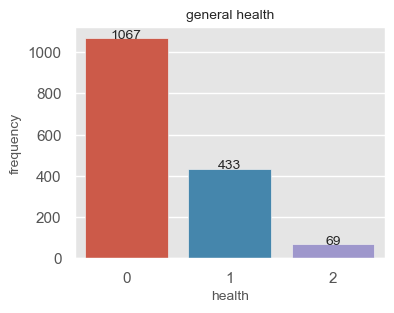

In [122]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='health2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('general health',fontsize = 10, fontweight='normal')
plot.set_xlabel('health', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [123]:
#calculating frequencies of the variables -  marital status variable
freq_maritalb=pd.crosstab(index=data2['maritalb'], columns='count')
freq_maritalb

col_0,count
maritalb,
1,736
2,3
3,2
4,210
5,105
6,512
88,1


In [124]:
#deleting observations with no response
data2.drop(data2[(data2.maritalb==88)].index, inplace=True)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2000628826.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(data2[(data2.maritalb==88)].index, inplace=True)


In [125]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['maritalb'])

maritalb,1,2,3,4,5,6
happy2,,,,,,
0,91,0,0,54,28,157
1,645,3,2,156,77,355


In [127]:
#Categorization of the marital status variable
def condition(x):
    if x<3:
        return 0
    elif x==6:
        return 2
    else:
        return 1
data2['maritalb2'] = data2['maritalb'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['maritalb2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2451278983.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['maritalb2'] = data2['maritalb'].apply(condition)


maritalb2,0,1,2
happy2,,,
0,91,82,157
1,648,235,355


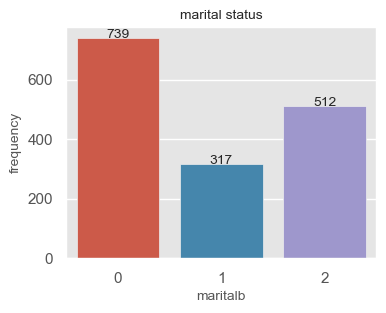

In [128]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='maritalb2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('marital status',fontsize = 10, fontweight='normal')
plot.set_xlabel('maritalb', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [201]:
#calculating frequencies of the variables -  Main activity, last 7 days variable
freq_mnactic=pd.crosstab(index=data2['mnactic'], columns='count')
freq_mnactic

col_0,count
mnactic,
1,772
2,148
3,33
4,24
5,12
6,521
7,4
8,30
9,18


In [ ]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['mnactic'])

In [129]:
#Categorization of the Main activity variable
def condition(x):
    if x==1:
        return 0
    elif x==2:
        return 1
    elif (x==3) | (x==4):
        return 2
    elif (x==5) | (x==6):
        return 3
    else:
        return 4
data2['mnactic2'] = data2['mnactic'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['mnactic2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\1149247619.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['mnactic2'] = data2['mnactic'].apply(condition)


mnactic2,0,1,2,3,4
happy2,,,,,
0,131,54,21,115,9
1,641,94,36,424,43


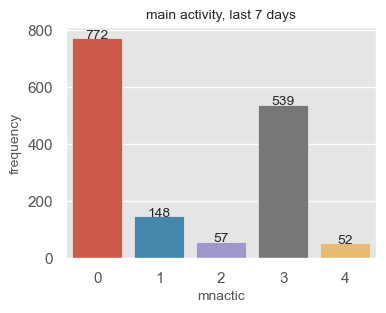

In [131]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='mnactic2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('main activity, last 7 days',fontsize = 10, fontweight='normal')
plot.set_xlabel('mnactic', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [132]:
#calculating frequencies of the variables -  Household's total net income
freq_hinctnta=pd.crosstab(index=data2['hinctnta'], columns='count')
freq_hinctnta


col_0,count
hinctnta,
1,114
2,108
3,87
4,137
5,141
6,186
7,182
8,185
9,222


In [133]:
#deleting observations with no response
data2.drop(data2[(data2.hinctnta==77) | (data2.hinctnta==88)].index, inplace=True)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\845455467.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(data2[(data2.hinctnta==77) | (data2.hinctnta==88)].index, inplace=True)


In [136]:
#contingency table
pd.crosstab(index=data2['happy2'], columns=data2['hinctnta'])

hinctnta,1,2,3,4,5,6,7,8,9,10
happy2,,,,,,,,,,
0,53,35,24,44,30,35,28,22,25,15
1,61,73,63,93,111,151,154,163,197,119


In [137]:
#Categorization of the Household's total net income variable
def condition(x):
    if x<4:
        return 0
    elif (x>=4) & (x<=7):
        return 1
    else:
        return 2
data2['hinctnta2'] = data2['hinctnta'].apply(condition)
pd.crosstab(index=data2['happy2'], columns=data2['hinctnta2'])

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\1566722712.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2['hinctnta2'] = data2['hinctnta'].apply(condition)


hinctnta2,0,1,2
happy2,,,
0,112,137,62
1,197,509,479


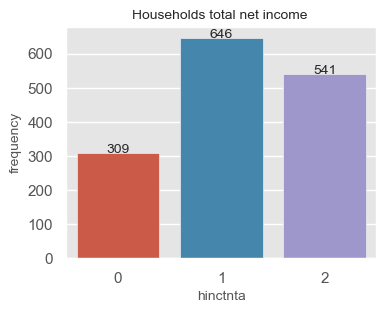

In [138]:
plt.figure(figsize=(4,3))
plot=sns.countplot(data=data2, x='hinctnta2')
plot.set_xticklabels(plot.get_xticklabels(),rotation=0)
plot.set_title('Households total net income ',fontsize = 10, fontweight='normal')
plot.set_xlabel('hinctnta', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [139]:
#calculating frequencies of the variables -  age
freq_agea=pd.crosstab(index=data2['agea'], columns='count')
freq_agea

col_0,count
agea,
15.0,5
16.0,9
17.0,16
18.0,15
19.0,9
...,...
85.0,11
86.0,7
87.0,3


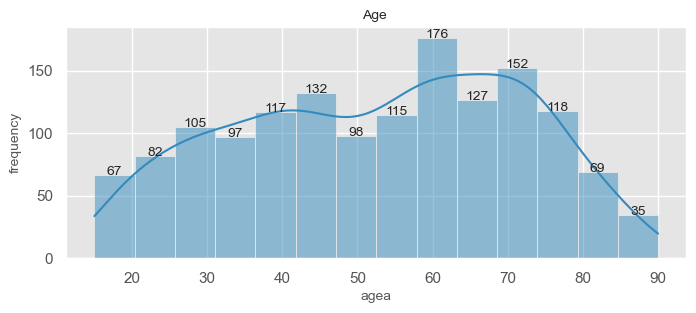

In [152]:
plt.figure(figsize=(8,3))
plot=sns.histplot(data=data2, x='agea',kde=True)
plot.set_title('Age ',fontsize = 10, fontweight='normal')
plot.set_xlabel('agea', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [153]:
#calculating frequencies of the variables -  education
freq_agea=pd.crosstab(index=data2['eduyrs'], columns='count')
freq_agea

col_0,count
eduyrs,
4,2
5,1
6,6
7,22
8,74
9,72
10,69
11,79
12,200


In [154]:
#deleting observations with no response
data2.drop(data2[(data2.eduyrs==77) | (data2.eduyrs==88) | (data2.eduyrs==99)].index, inplace=True)

C:\Users\GU44DR\AppData\Local\Temp\ipykernel_9048\2024525258.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.drop(data2[(data2.eduyrs==77) | (data2.eduyrs==88) | (data2.eduyrs==99)].index, inplace=True)


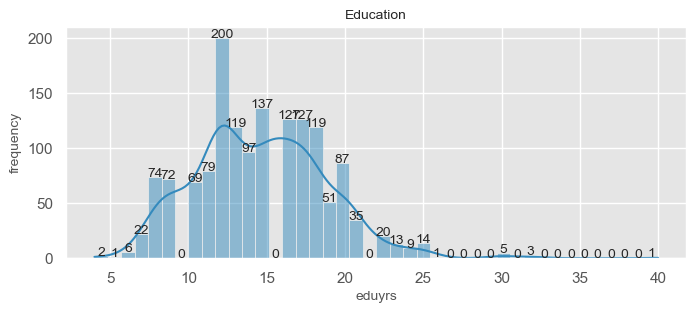

In [156]:
plt.figure(figsize=(8,3))
plot=sns.histplot(data=data2, x='eduyrs' ,kde=True)
plot.set_title('Education',fontsize = 10, fontweight='normal')
plot.set_xlabel('eduyrs', fontsize = 10)
plot.set_ylabel('frequency', fontsize = 10)
for rect in plot.patches:
    plot.text (rect.get_x() + rect.get_width()/2 ,rect.get_height(),rect.get_height(),horizontalalignment='center', fontsize = 10)

plt.show()

In [157]:
# creating dummies variables for categorical variables
data3=pd.get_dummies(data2, columns=['domicil2' ,'rlgdgr2' ,'sclmeet2','health2' ,'maritalb2', 'mnactic2' ,'hinctnta2'], prefix=['domicil2' ,'rlgdgr2' ,'sclmeet2','health2' ,'maritalb2', 'mnactic2' ,'hinctnta2'])
data3.head()

,happy,gndr,agea,dvrcdeva,eduyrs,domicil,rlgdgr,netusoft,sclmeet,health,...,maritalb2_1,maritalb2_2,mnactic2_0,mnactic2_1,mnactic2_2,mnactic2_3,mnactic2_4,hinctnta2_0,hinctnta2_1,hinctnta2_2
6736,10,2,24.0,1,12,3,0,5,4,1,...,1,0,1,0,0,0,0,1,0,0
6737,9,1,77.0,1,14,4,8,5,6,1,...,0,0,0,0,0,1,0,0,0,1
6738,2,2,33.0,2,18,3,0,5,5,4,...,0,1,1,0,0,0,0,0,1,0
6739,9,2,75.0,2,10,4,7,5,5,1,...,0,1,0,0,0,1,0,0,1,0
6740,9,2,32.0,2,18,5,10,5,3,2,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
 #Transform the Numerical Variables: Scaling
 

In [158]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

In [159]:
# Create the X and y data sets
X = data3[['gndr2','agea','dvrcdeva2','eduyrs','netusoft2' ,'domicil2_0','domicil2_1','domicil2_2' ,'rlgdgr2_0','rlgdgr2_1','rlgdgr2_2' ,'sclmeet2_0','sclmeet2_1', 'sclmeet2_2','health2_0','health2_1','health2_2',
'maritalb2_0','maritalb2_1','maritalb2_2','mnactic2_0','mnactic2_1', 'mnactic2_2', 'mnactic2_3', 'mnactic2_4', 'mnactic2_0', 'mnactic2_1',
'mnactic2_3','mnactic2_4','hinctnta2_0','hinctnta2_1','hinctnta2_2']]
y = data3[['happy2']]

# Create and fit a logistic regression model
model = LogisticRegression(solver='liblinear', C=10.0, random_state=0,max_iter=50000)
model.fit(X, np.ravel(y))

# Print the parameters of the model
print(model.get_params())


{'C': 10.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 50000, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [161]:
# Print the intercept of the model
print(model.intercept_)

[-0.28278746]


In [162]:
# Print the models coefficients
print(model.coef_)

[[-1.61953914e-01  2.02790720e-02 -1.46960726e-01  1.35789267e-03
   6.46953261e-01 -3.07773167e-01 -1.24078252e-01  1.49063958e-01
  -3.82783782e-01 -1.97877729e-01  2.97874051e-01 -4.98213459e-01
  -6.26727492e-02  2.78098748e-01  1.26114442e+00 -1.85496282e-01
  -1.35843559e+00  2.50706340e-01 -1.44535385e-01 -3.88958416e-01
   2.96621568e-02 -1.30519542e-01 -4.27209630e-01  7.95509775e-02
   1.65728577e-01  2.96621568e-02 -1.30519542e-01  7.95509775e-02
   1.65728577e-01 -4.82966220e-01 -2.16451959e-01  4.16630718e-01]]


In [163]:
model.predict_proba(X)

array([[0.30077085, 0.69922915],
       [0.01156236, 0.98843764],
       [0.80474816, 0.19525184],
       ...,
       [0.27644079, 0.72355921],
       [0.12436292, 0.87563708],
       [0.47348203, 0.52651797]])

In [164]:
model.score(X, y)

0.8154362416107382

In [165]:
confusion_matrix(y, model.predict(X))

array([[  77,  233],
       [  42, 1138]], dtype=int64)

In [166]:
print(classification_report(y, model.predict(X)))

              precision    recall  f1-score   support

           0       0.65      0.25      0.36       310
           1       0.83      0.96      0.89      1180

    accuracy                           0.82      1490
   macro avg       0.74      0.61      0.63      1490
weighted avg       0.79      0.82      0.78      1490



In [168]:
# Using test_train_split to create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=123)

In [172]:
#Evaluate the model on training sample
p_pred_train = model.predict_proba(X_train)
y_pred_train = model.predict(X_train)
score_train = model.score(X_train, y_train)
conf_m_train = confusion_matrix(y_train, y_pred_train)
report_train = classification_report(y_train, y_pred_train)

In [175]:
print(score_train)

0.8197507190795782


In [176]:
print(report_train)

              precision    recall  f1-score   support

           0       0.62      0.27      0.38       210
           1       0.84      0.96      0.89       833

    accuracy                           0.82      1043
   macro avg       0.73      0.61      0.64      1043
weighted avg       0.79      0.82      0.79      1043



In [178]:
#Evaluate the model on validation sample
p_pred_test = model.predict_proba(X_test)
y_pred_test = model.predict(X_test)
score_test = model.score(X_test, y_test)
conf_m_test = confusion_matrix(y_test, y_pred_test)
report_test = classification_report(y_test, y_pred_test)

In [179]:
print(score_test)

0.8053691275167785


In [180]:
print(report_test)

              precision    recall  f1-score   support

           0       0.74      0.20      0.31       100
           1       0.81      0.98      0.89       347

    accuracy                           0.81       447
   macro avg       0.78      0.59      0.60       447
weighted avg       0.79      0.81      0.76       447

